### Base Learner

In [9]:
from fastai2.vision.all import *
import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True)

In [3]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,1.311591,0.213002,0.944251,0.993031,0.949477,00:13
1,0.755342,0.104664,0.975610,0.991289,0.982578,00:10


In [4]:
learn.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,TestSetRecorder]

In [7]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.812719,0.464912,0.925439,0.543860
1,1.641920,0.500000,0.929825,0.574561


In [10]:
rm_test_recorder(learn)

In [11]:
learn.cbs

(#3) [TrainEvalCallback,Recorder,ProgressCallback]

In [14]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                     ds_idx=1)

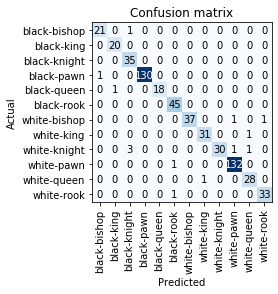

In [15]:
interp.plot_confusion_matrix()

In [16]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                     ds_idx=2)

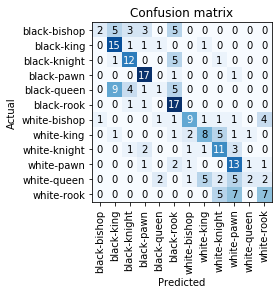

In [17]:
interp.plot_confusion_matrix()

In [37]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(interp.targs.numpy(),
         torch.argmax(interp.preds, dim=1).numpy())

0.5

In [41]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.502378,0.103032,0.986063,0.996516,0.987805,00:10
1,0.443171,0.096925,0.987805,0.996516,0.991289,00:10


0.5745614035087719

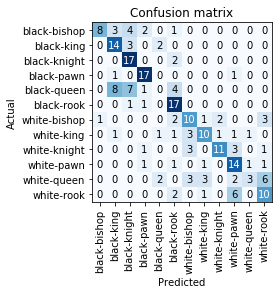

In [42]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                     ds_idx=2)
interp.plot_confusion_matrix()
accuracy_score(interp.targs.numpy(),
         torch.argmax(interp.preds, dim=1).numpy())